# SENTIMENT ANALYSIS

## EXPLORATORY DATA ANALYSIS (EDA)

In [155]:
# dataset loading

import pandas as pd

df = pd.read_excel(r"C:\Users\KRITIKA\Downloads\Sentiment Analysis\dataset -P543(1370).xlsx")
df

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."
...,...,...,...
1435,Excellent mobile,5,Excellent mobile
1436,Never expected from samsung,1,"All over mobile performance is very poor, neve..."
1437,Good value for money,5,Battery life is good but camera clarity could ...
1438,Unreal and whitish display,1,"It's a very bad product, highly dissatisfied....."


In [156]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1440 non-null   object
 1   rating  1440 non-null   int64 
 2   body    1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.9+ KB


In [161]:
df.describe()

,rating
count,1440.000000
mean,3.173611
std,1.584453
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [163]:
df.isnull().sum()

title     0
rating    0
body      0
dtype: int64

In [165]:
df.duplicated().sum()

0

In [167]:
print(df.columns)

Index(['title', 'rating', 'body'], dtype='object')


In [169]:
# Create a new column 'sentiment' based on 'rating'
df['sentiment'] = df['rating'].apply(
    lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive')
)

In [171]:
df.head()

,title,rating,body,sentiment
0,Horrible product,1,Very disappointed with the overall performance...,Negative
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Neutral
2,Overall,4,"Got the mobile on the launch date,Battery must...",Positive
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,Negative
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Negative


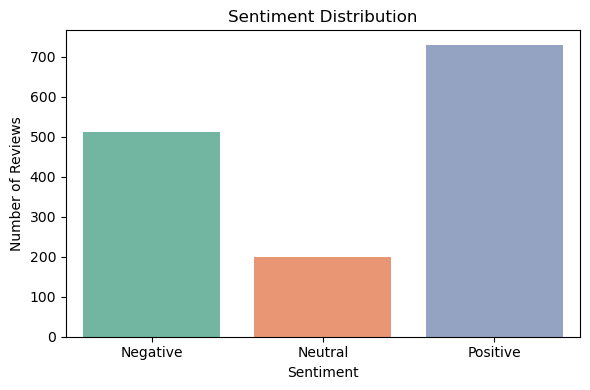

In [173]:
# sentiment distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

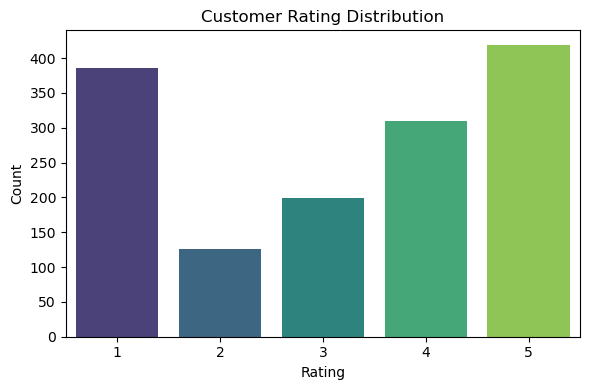

In [174]:
# rating distribution

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\KRITIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


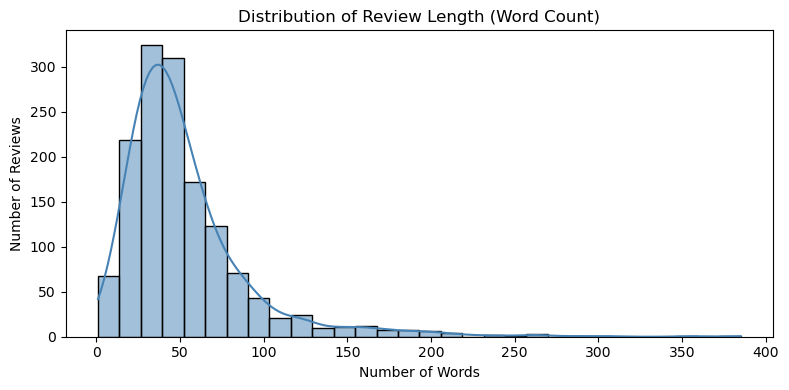

In [175]:
# review length distribution

# Add a column for review length
df['review_length'] = df['body'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['review_length'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Review Length (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [177]:
import re

def clean_text(text):
    text = str(text).lower()                          # lowercase
    text = re.sub(r'[^a-z\s]', '', text)              # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra whitespace
    return text

# Apply to the 'body' column
df['cleaned_review'] = df['body'].apply(clean_text)

C:\Users\KRITIKA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


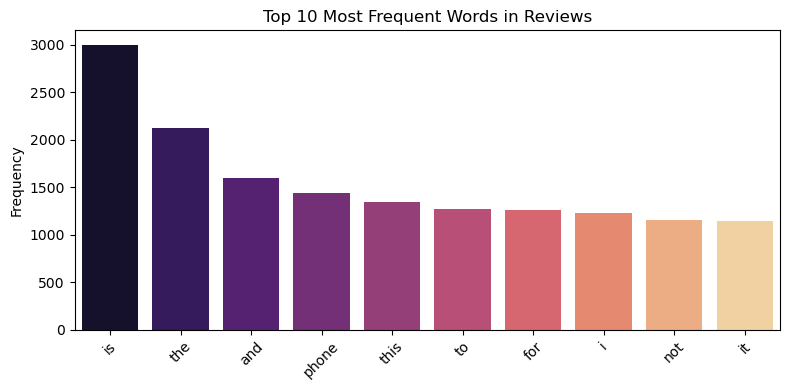

In [178]:
# top frequent words in reviews

from collections import Counter

all_words = ' '.join(df['cleaned_review']).split()
word_freq = Counter(all_words).most_common(10)
words, freqs = zip(*word_freq)

plt.figure(figsize=(8, 4))
sns.barplot(x=list(words), y=list(freqs), palette='magma')
plt.title("Top 10 Most Frequent Words in Reviews")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

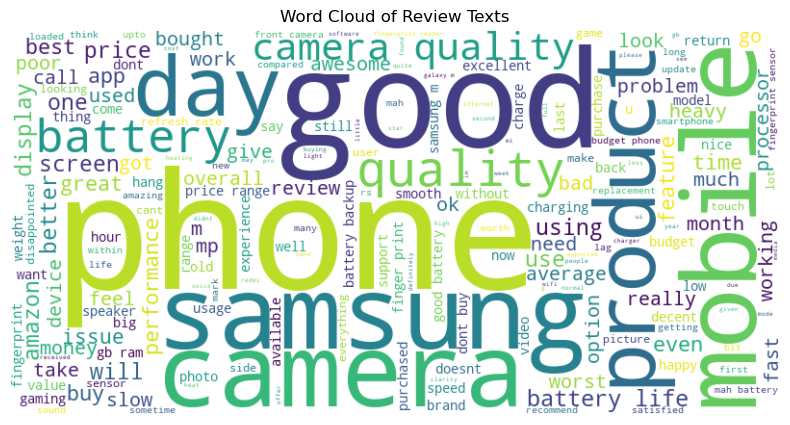

In [180]:
# word cloud

from wordcloud import WordCloud

text = ' '.join(df['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Review Texts")
plt.show()

## TEXT PREPROCESSING

In [182]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_review(text):
    text = str(text).lower()                                 # Lowercase
    text = re.sub(r'https?://\S+|www\.\S+', '', text)        # Remove URLs
    text = re.sub(r'<.*?>', '', text)                        # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)                     # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()                 # Remove extra whitespace
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords & stem
    return ' '.join(words)

# Apply to the 'body' column
df['cleaned_review'] = df['body'].apply(clean_review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KRITIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## MODEL BUILDING

In [186]:
X = df['cleaned_review']  # Feature: cleaned reviews
y = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [187]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # you can adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.metrics import accuracy_score, classification_report

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (LinearSVC)": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n📌 Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))
    
    results[name] = acc


📌 Training Logistic Regression...
✅ Accuracy: 0.8229
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       155
           1       0.78      0.86      0.82       133

    accuracy                           0.82       288
   macro avg       0.82      0.83      0.82       288
weighted avg       0.83      0.82      0.82       288


📌 Training Naive Bayes...
✅ Accuracy: 0.7882
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.66      0.77       155
           1       0.70      0.94      0.80       133

    accuracy                           0.79       288
   macro avg       0.81      0.80      0.79       288
weighted avg       0.82      0.79      0.79       288


📌 Training SVM (LinearSVC)...
✅ Accuracy: 0.8160
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       155
         

C:\Users\KRITIKA\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:04:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7847
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       155
           1       0.74      0.81      0.78       133

    accuracy                           0.78       288
   macro avg       0.79      0.79      0.78       288
weighted avg       0.79      0.78      0.79       288



In [191]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n📊 Model Accuracy Comparison:")
print(results_df)


📊 Model Accuracy Comparison:
                 Model  Accuracy
0  Logistic Regression  0.822917
1      SVM (LinearSVC)  0.815972
2        Random Forest  0.812500
3          Naive Bayes  0.788194
4              XGBoost  0.784722


In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # supports both l1 and l2
}

# Initialize the model
lr = LogisticRegression(max_iter=1000)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit to the training data
grid_search.fit(X_train_vec, y_train)

# Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best Cross-Validated Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate on test set
best_lr = grid_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test_vec)

from sklearn.metrics import classification_report, accuracy_score

print("\n📊 Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_tuned)))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_tuned))

✅ Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
📈 Best Cross-Validated Accuracy: 0.8229

📊 Test Accuracy: 0.8229
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       155
           1       0.78      0.86      0.82       133

    accuracy                           0.82       288
   macro avg       0.82      0.83      0.82       288
weighted avg       0.83      0.82      0.82       288



In [193]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000]
}

svc = LinearSVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train_vec, y_train)

# Results
print("✅ Best Parameters:", grid_svc.best_params_)
print("📈 Best Cross-Validated Accuracy:", grid_svc.best_score_)

# Test set evaluation
best_svc_model = grid_svc.best_estimator_
y_pred_svc = best_svc_model.predict(X_test_vec)

print("\n📊 Test Accuracy:", accuracy_score(y_test, y_pred_svc))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_svc))

✅ Best Parameters: {'C': 0.1, 'max_iter': 1000}
📈 Best Cross-Validated Accuracy: 0.821166948993036

📊 Test Accuracy: 0.8333333333333334
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.84       155
           1       0.79      0.88      0.83       133

    accuracy                           0.83       288
   macro avg       0.84      0.84      0.83       288
weighted avg       0.84      0.83      0.83       288



In [194]:
import joblib

# Save the best SVM model
joblib.dump(best_svc_model, 'svm_sentiment_model.pkl')

# Save your TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [195]:
from collections import Counter
print("Class distribution:", Counter(y_train))

Class distribution: Counter({1: 596, 0: 556})
